In [1]:
import os
import numpy as np
import mido
from mido import MidiFile
from mido import MetaMessage
from mido import tempo2bpm, bpm2tempo

In [2]:
def readmidi(filepath = ""):
    mid = MidiFile(os.getcwd() + filepath)
    
    event_list = []
    timing = 0
    
    # midi檔案名稱
    print('MIDI File :',filepath)
        
    for i, track in enumerate(mid.tracks):
        #print('Track {} : {} '.format(i, track.name))
        #print('Track {} : {} '.format(i, len(track)))
        
        # 印出tick值
        print ("Ticks per beat:",mid.ticks_per_beat)
        
        #if len(track) > 100:
            #break
        
        for info in track:
            # 印出調號
            if info.type == 'key_signature':
                print('Key_signature :',info.key)
            # 印出拍號
            if info.type == 'time_signature':
                print('Time_signature : numerator={} denominator={}'.format(info.numerator,info.denominator))
            # 印出拍子轉bpm
            if info.type == "set_tempo":
                print("Tempo(BPM):",tempo2bpm(info.tempo))
        
        for msg in track:
            #print(msg)
            timing += msg.time
            
            if msg.type == 'note_on' and msg.bytes()[2] != 0:
                event_list.append([msg.bytes()[1],timing])
    
    print()
    # 印出[midi音符值，time的tick值]
    print('event_list :\n', event_list)

    time_ = 0
    playone = []
    playlist = []

    for i in event_list:
        if len(playone) == 0 or time_ == i[1]:
            playone.append(i[0])
        else:
            playlist.append(playone)
            playone = [i[0]]
            time_ = i[1]
    
    # 印出midi中有哪些音符
    print('playlist :\n', playlist)
    
    return
    #return playlist

In [3]:
base_dir = '/MIDI/sampleMidi/'

In [4]:
readmidi(base_dir + 'Silent_Night_test2.mid')

MIDI File : /MIDI/sampleMidi/Silent_Night_test2.mid
Ticks per beat: 480
Time_signature : numerator=3 denominator=4
Key_signature : C
Tempo(BPM): 100.00016666694445

event_list :
 [[67, 0], [69, 720], [67, 960], [64, 1440], [67, 2880], [69, 3600], [67, 3840], [64, 4320], [74, 5760], [74, 6720], [71, 7200], [72, 8640], [72, 9600], [67, 10080], [69, 11520], [69, 12480], [72, 12960], [71, 13680], [69, 13920], [67, 14400], [69, 15120], [67, 15360], [64, 15840], [69, 17280], [69, 18240], [72, 18720], [71, 19440], [69, 19680], [67, 20160], [69, 20880], [67, 21120], [64, 21600], [74, 23040], [74, 24000], [77, 24480], [74, 24960], [71, 25440], [72, 25920], [76, 27360], [72, 28800], [67, 29280], [64, 29760], [67, 30240], [65, 30960], [62, 31200], [60, 31680]]
playlist :
 [[67], [69], [67], [64], [67], [69], [67], [64], [74], [74], [71], [72], [72], [67], [69], [69], [72], [71], [69], [67], [69], [67], [64], [69], [69], [72], [71], [69], [67], [69], [67], [64], [74], [74], [77], [74], [71], [72],

In [5]:
readmidi(base_dir + 'Silent_Night_test3.mid')

MIDI File : /MIDI/sampleMidi/Silent_Night_test3.mid
Ticks per beat: 480
Time_signature : numerator=3 denominator=4
Key_signature : C
Tempo(BPM): 100.0
Ticks per beat: 480
Key_signature : C

event_list :
 [[67, 0], [69, 720], [67, 960], [64, 1440], [67, 2880], [69, 3600], [67, 3840], [64, 4320], [74, 5760], [74, 6720], [71, 7200], [72, 8640], [72, 9600], [67, 10080], [60, 11448], [60, 12888], [60, 14328], [60, 15768], [59, 16248], [57, 16728], [55, 17208], [55, 18648], [55, 19608], [60, 20088], [60, 21528]]
playlist :
 [[67], [69], [67], [64], [67], [69], [67], [64], [74], [74], [71], [72], [72], [67], [60], [60], [60], [60], [59], [57], [55], [55], [55], [60]]


In [6]:
readmidi(base_dir + 'Cool_Blues_test1.mid')

MIDI File : /MIDI/sampleMidi/Cool_Blues_test1.mid
Ticks per beat: 480
Time_signature : numerator=4 denominator=4
Key_signature : C
Tempo(BPM): 100.00016666694445

event_list :
 [[57, 0], [60, 240], [62, 480], [64, 720], [64, 960], [64, 1920], [62, 2160], [60, 2400], [57, 2640], [57, 2880], [57, 3840], [60, 4080], [62, 4320], [64, 4560], [64, 4800], [64, 5760], [62, 6000], [60, 6240], [57, 6480], [57, 6720], [57, 7680], [60, 7920], [62, 8160], [64, 8400], [64, 8640], [64, 9600], [62, 9840], [60, 10080], [57, 10320], [57, 10560], [57, 11520], [60, 11760], [62, 12000], [64, 12240], [64, 12480], [64, 13440], [62, 13680], [60, 13920], [57, 14160], [57, 14400], [64, 15360], [64, 15600], [67, 15840], [64, 16080], [67, 16320], [64, 16560], [64, 17040], [64, 17280], [64, 19200], [64, 19440], [67, 19680], [64, 19920], [67, 20160], [64, 20400], [64, 20880], [64, 21120]]
playlist :
 [[57], [60], [62], [64], [64], [64], [62], [60], [57], [57], [57], [60], [62], [64], [64], [64], [62], [60], [57], [

In [7]:
readmidi(base_dir + 'Cool_Blues_test2.mid')

MIDI File : /MIDI/sampleMidi/Cool_Blues_test2.mid
Ticks per beat: 480
Time_signature : numerator=4 denominator=4
Key_signature : C
Tempo(BPM): 100.00016666694445
Ticks per beat: 480
Key_signature : C

event_list :
 [[57, 0], [60, 240], [62, 480], [64, 720], [64, 960], [64, 1920], [62, 2160], [60, 2400], [57, 2640], [57, 2880], [57, 3840], [60, 4080], [62, 4320], [64, 4560], [64, 4800], [64, 5760], [62, 6000], [60, 6240], [57, 6480], [57, 6720], [57, 7680], [60, 7920], [62, 8160], [64, 8400], [64, 8640], [64, 9600], [62, 9840], [60, 10080], [57, 10320], [57, 10560], [57, 11520], [60, 11760], [62, 12000], [64, 12240], [64, 12480], [64, 13440], [62, 13680], [60, 13920], [57, 14160], [57, 14400], [64, 15360], [64, 15600], [67, 15840], [64, 16080], [67, 16320], [64, 16560], [64, 17040], [64, 17280], [64, 19200], [64, 19440], [67, 19680], [64, 19920], [67, 20160], [64, 20400], [64, 20880], [64, 21120], [45, 22944], [45, 23424], [45, 23904], [45, 24384], [45, 24864], [45, 25344], [45, 25824],

# 提取midi文件中的訊息和時間

https://zhuanlan.zhihu.com/p/62475524

In [8]:
path = 'MIDI/sampleMidi/Cool_Blues_test1.mid'
mid = MidiFile('MIDI/sampleMidi/Cool_Blues_test1.mid')
txt = path.split('/')
#print(txt[-1]) # 取得list中最後一個元素
midiname = txt[-1]

# 括號內輸入midi BPM的值
tempo = mido.bpm2tempo(100)
count = 0

for i, track in enumerate(mid.tracks):
    print('Track {}: {}'.format(i, midiname))
    passed_time = 0
    
    for msg in track:
        #print(msg)
        #print(count)
        
        if msg.type == "set_tempo":
            tempo = msg.tempo
            print("Tempo:",tempo)
            print("Bpm:",tempo2bpm(msg.tempo))
            print()
        
        # 把tick單位轉成second單位
        ab_time = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)
        '''
        if count == 2:
            print('Time:{} \nTicks_per_beat:{} \nTempo:{}'.format(msg.time, mid.ticks_per_beat, tempo))
            print('ab_time:',ab_time)
            print('passed_time:',passed_time)
        '''
        
        # real_time是每一個事件在整個midi文件中的真實時間位置
        real_time = ab_time + passed_time
        passed_time += ab_time
        
        if msg.type == "note_on":
            velocity = msg.velocity
            note = msg.note    
            #print("note = " + str(note) + '  |  ' + "real time = " + str(round(real_time, 3)))
            
            #'''
            if velocity == 0:
                print("note = " + str(note) + '  |  ' + "real time = " + str(round(real_time, 3)))
                #print(msg, " real time=" + str(round(real_time, 3)))
                count += 1
            #'''
            
    print()
    print('Midi Length:',real_time)
    print('Count:',count)

Track 0: Cool_Blues_test1.mid
Tempo: 599999
Bpm: 100.00016666694445

note = 57  |  real time = 0.284
note = 60  |  real time = 0.584
note = 62  |  real time = 0.884
note = 64  |  real time = 1.184
note = 64  |  real time = 2.339
note = 64  |  real time = 2.684
note = 62  |  real time = 2.984
note = 60  |  real time = 3.284
note = 57  |  real time = 3.584
note = 57  |  real time = 4.739
note = 57  |  real time = 5.084
note = 60  |  real time = 5.384
note = 62  |  real time = 5.684
note = 64  |  real time = 5.984
note = 64  |  real time = 7.139
note = 64  |  real time = 7.484
note = 62  |  real time = 7.784
note = 60  |  real time = 8.084
note = 57  |  real time = 8.384
note = 57  |  real time = 9.539
note = 57  |  real time = 9.884
note = 60  |  real time = 10.184
note = 62  |  real time = 10.484
note = 64  |  real time = 10.784
note = 64  |  real time = 11.939
note = 64  |  real time = 12.284
note = 62  |  real time = 12.584
note = 60  |  real time = 12.884
note = 57  |  real time = 13

In [11]:
def analyzemidi(path = ""):
    mid = MidiFile(path)
    txt = path.split('/')
    midiname = txt[-1]
    
    count = 0

    for i, track in enumerate(mid.tracks):
        print('Track {}: {}'.format(i, midiname))
        passed_time = 0
        
        for info in track:
            if info.type == "set_tempo":
                tempo = info.tempo
                print("Tempo:",tempo)
                print("Bpm:",tempo2bpm(info.tempo))
                print()
        
        for msg in track:
            #print(msg)
            #print(count)

            # 把tick單位轉成second單位
            ab_time = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)
            
            y = ab_time
            '''
            if count == 2:
                print('Time:{} \nTicks_per_beat:{} \nTempo:{}'.format(msg.time, mid.ticks_per_beat, tempo))
                print('ab_time:',ab_time)
                print('passed_time:',passed_time)
            '''
            
            # real_time是每一個事件在整個midi文件中的真實時間位置
            
            real_time = ab_time + passed_time
            passed_time += ab_time  
            
            if msg.type == "note_on":
                velocity = msg.velocity
                note = msg.note    
                #print("note = " + str(note) + '  |  ' + "real time = " + str(round(real_time, 3)))
                
                #'''

                if velocity == 80:
                    x = passed_time
                    #print('ab_time + passed_time = ' + str(y) + ' + ' + str(x) + ' = ' + str(real_time))
                if velocity == 0:
                    #print('ab_time + passed_time = ' + str(y) + ' + ' + str(x) + ' = ' + str(real_time))
                    print("note = " + str(note) + '  |  ' + "real time = " + str(round(real_time, 3)))
                    #print()
                    #print(msg, " real time=" + str(round(real_time, 3)))
                    count += 1
                #'''
            
    print()
    print('Midi Length:',real_time)
    print('Count:',count)

In [10]:
analyzemidi('MIDI/sampleMidi/Cool_Blues_test1.mid')

Track 0: Cool_Blues_test1.mid
Tempo: 599999
Bpm: 100.00016666694445

ab_time + passed_time = 0.0 + 0.0 = 0.0
ab_time + passed_time = 0.2837495270833333 + 0.0 = 0.2837495270833333
note = 57  |  real time = 0.284

ab_time + passed_time = 0.016249972916666664 + 0.2999995 = 0.2999995
ab_time + passed_time = 0.2837495270833333 + 0.2999995 = 0.5837490270833332
note = 60  |  real time = 0.584

ab_time + passed_time = 0.016249972916666664 + 0.5999989999999998 = 0.5999989999999998
ab_time + passed_time = 0.2837495270833333 + 0.5999989999999998 = 0.8837485270833332
note = 62  |  real time = 0.884

ab_time + passed_time = 0.016249972916666664 + 0.8999984999999998 = 0.8999984999999998
ab_time + passed_time = 0.2837495270833333 + 0.8999984999999998 = 1.1837480270833332
note = 64  |  real time = 1.184

ab_time + passed_time = 0.016249972916666664 + 1.199998 = 1.199998
ab_time + passed_time = 1.1387481020833332 + 1.199998 = 2.3387461020833333
note = 64  |  real time = 2.339

ab_time + passed_time = 0

In [12]:
analyzemidi('MIDI/sampleMidi/Cool_Blues_test2.mid')

Track 0: Cool_Blues_test2.mid
Tempo: 599999
Bpm: 100.00016666694445

note = 57  |  real time = 0.284
note = 60  |  real time = 0.584
note = 62  |  real time = 0.884
note = 64  |  real time = 1.184
note = 64  |  real time = 2.339
note = 64  |  real time = 2.684
note = 62  |  real time = 2.984
note = 60  |  real time = 3.284
note = 57  |  real time = 3.584
note = 57  |  real time = 4.739
note = 57  |  real time = 5.084
note = 60  |  real time = 5.384
note = 62  |  real time = 5.684
note = 64  |  real time = 5.984
note = 64  |  real time = 7.139
note = 64  |  real time = 7.484
note = 62  |  real time = 7.784
note = 60  |  real time = 8.084
note = 57  |  real time = 8.384
note = 57  |  real time = 9.539
note = 57  |  real time = 9.884
note = 60  |  real time = 10.184
note = 62  |  real time = 10.484
note = 64  |  real time = 10.784
note = 64  |  real time = 11.939
note = 64  |  real time = 12.284
note = 62  |  real time = 12.584
note = 60  |  real time = 12.884
note = 57  |  real time = 13

In [13]:
analyzemidi('MIDI/sampleMidi/Silent_Night_test1.mid')

Track 0: Silent_Night_test1.mid
Tempo: 500000
Bpm: 120.0

note = 67  |  real time = 0.711
note = 69  |  real time = 0.986
note = 67  |  real time = 1.474
note = 64  |  real time = 2.924
note = 67  |  real time = 3.711
note = 69  |  real time = 3.986
note = 67  |  real time = 4.474
note = 64  |  real time = 5.924
note = 74  |  real time = 6.949
note = 74  |  real time = 7.474
note = 71  |  real time = 8.924
note = 72  |  real time = 9.949
note = 72  |  real time = 10.474
note = 67  |  real time = 11.924

Midi Length: 11.925
Count: 14


In [14]:
analyzemidi('MIDI/sampleMidi/Silent_Night_test2.mid')

Track 0: Silent_Night_test2.mid
Tempo: 599999
Bpm: 100.00016666694445

note = 67  |  real time = 0.854
note = 69  |  real time = 1.184
note = 67  |  real time = 1.769
note = 64  |  real time = 3.509
note = 67  |  real time = 4.454
note = 69  |  real time = 4.784
note = 67  |  real time = 5.369
note = 64  |  real time = 7.109
note = 74  |  real time = 8.339
note = 74  |  real time = 8.969
note = 71  |  real time = 10.709
note = 72  |  real time = 11.939
note = 72  |  real time = 12.569
note = 67  |  real time = 14.309
note = 69  |  real time = 15.539
note = 69  |  real time = 16.169
note = 72  |  real time = 17.054
note = 71  |  real time = 17.384
note = 69  |  real time = 17.969
note = 67  |  real time = 18.854
note = 69  |  real time = 19.184
note = 67  |  real time = 19.769
note = 64  |  real time = 21.509
note = 69  |  real time = 22.739
note = 69  |  real time = 23.369
note = 72  |  real time = 24.254
note = 71  |  real time = 24.584
note = 69  |  real time = 25.169
note = 67  |  r

In [15]:
import pandas as pd
msg.time = 13 
mid.ticks_per_beat = 480
tempo = 600000

ab_time = mido.tick2second(msg.time, mid.ticks_per_beat, tempo)
types = ["time", "ticks_per_beat", "tempo", "absolute time"]
values = [msg.time, mid.ticks_per_beat, tempo, ab_time]
dictionary = {"type": types,"value": values}
df = pd.DataFrame(dictionary)
df

,type,value
0,time,13.00000
1,ticks_per_beat,480.00000
2,tempo,600000.00000
3,absolute time,0.01625


# 取得MIDI中的音符和休止符

https://stackoverflow.com/questions/49339622/how-to-extract-individual-chords-rests-and-notes-from-a-midi-file

In [16]:
import music21
from music21 import *

In [17]:
def get_notes_chords_rests(instrument_type, path):
    try:
        midi = converter.parse(path)
        parts = instrument.partitionByInstrument(midi)
        note_list = []
        for music_instrument in range(len(parts)):
            if parts.parts[music_instrument].id in instrument_type:
                for element_by_offset in stream.iterator.OffsetIterator(parts[music_instrument]):
                    for entry in element_by_offset:
                        if isinstance(entry, note.Note):
                            note_list.append(str(entry.pitch))
                        elif isinstance(entry, chord.Chord):
                            note_list.append('.'.join(str(n) for n in entry.normalOrder))
                        elif isinstance(entry, note.Rest):
                            note_list.append('Rest')
        return note_list
    except Exception as e:
        print("failed on ", path)
        pass

In [18]:
# keyboard_nstrument = ["KeyboardInstrument", "Piano", "Harpsichord", "Clavichord", "Celesta", ]
notes = get_notes_chords_rests("Piano", "MIDI/MIDI - Beauty_and_the_Beast.mid")
print(notes)

['Rest', 'A3', 'C4', 'E4', 'F4', 'B-3', 'Rest', 'A3', 'C4', 'E4', 'F4', 'G4', 'Rest', 'F4', 'G4', 'A4', 'B-4', 'C5', 'C5', 'B-4', 'A4', 'G4', 'F4', 'B-4', 'A4', 'G4', 'F4', 'C4']


In [19]:
# 取得音符和時間點另外方法
# https://programtalk.com/python-examples/music21.midi.MidiFile/
mf = music21.midi.MidiFile()
mf.open('MIDI/sampleMidi/Cool_Blues_test2.mid')
mf.read()

tracknum = 0
t = 0
events = mf.tracks[tracknum].events
#print(events)
result = []

for e in events:
    if e.isDeltaTime and (e.time is not None):          
        t += e.time
             
    elif (e.isNoteOn and (e.pitch is not None) and (e.velocity != 0) and (e.pitch > 11)):           
        result.append({'time':t, 'note':e.pitch})

print('Count：',len(result))
result

Count： 56


[{'time': 0, 'note': 57},
 {'time': 240, 'note': 60},
 {'time': 480, 'note': 62},
 {'time': 720, 'note': 64},
 {'time': 960, 'note': 64},
 {'time': 1920, 'note': 64},
 {'time': 2160, 'note': 62},
 {'time': 2400, 'note': 60},
 {'time': 2640, 'note': 57},
 {'time': 2880, 'note': 57},
 {'time': 3840, 'note': 57},
 {'time': 4080, 'note': 60},
 {'time': 4320, 'note': 62},
 {'time': 4560, 'note': 64},
 {'time': 4800, 'note': 64},
 {'time': 5760, 'note': 64},
 {'time': 6000, 'note': 62},
 {'time': 6240, 'note': 60},
 {'time': 6480, 'note': 57},
 {'time': 6720, 'note': 57},
 {'time': 7680, 'note': 57},
 {'time': 7920, 'note': 60},
 {'time': 8160, 'note': 62},
 {'time': 8400, 'note': 64},
 {'time': 8640, 'note': 64},
 {'time': 9600, 'note': 64},
 {'time': 9840, 'note': 62},
 {'time': 10080, 'note': 60},
 {'time': 10320, 'note': 57},
 {'time': 10560, 'note': 57},
 {'time': 11520, 'note': 57},
 {'time': 11760, 'note': 60},
 {'time': 12000, 'note': 62},
 {'time': 12240, 'note': 64},
 {'time': 1248

# mutagen 取得MP3檔案之長度

In [20]:
# 使用 mutagen取得 mp3長度
import mutagen
from mutagen.mp3 import MP3
audio = MP3('MIDI/sampleMidi/Silent_Night_test1.mp3')
print("Duration: " + str(audio.info.length))

Duration: 13.9755


# pretty_midi 取得MIDI檔案長度

https://github.com/craffel/pretty-midi

https://github.com/craffel/pretty-midi/blob/master/Tutorial.ipynb

In [21]:
import pretty_midi
import numpy as np
import mir_eval.display
import librosa.display
import matplotlib.pyplot as plt
import IPython.display

In [22]:
def plot_piano_roll(pm, start_pitch, end_pitch, fs=100):
    # 使用librosa的specshow函式用於顯示piano roll鋼琴卷
    librosa.display.specshow(pm.get_piano_roll(fs)[start_pitch:end_pitch],
                             hop_length=1, sr=fs, x_axis='time', y_axis='cqt_note',
                             fmin=pretty_midi.note_number_to_hz(start_pitch))

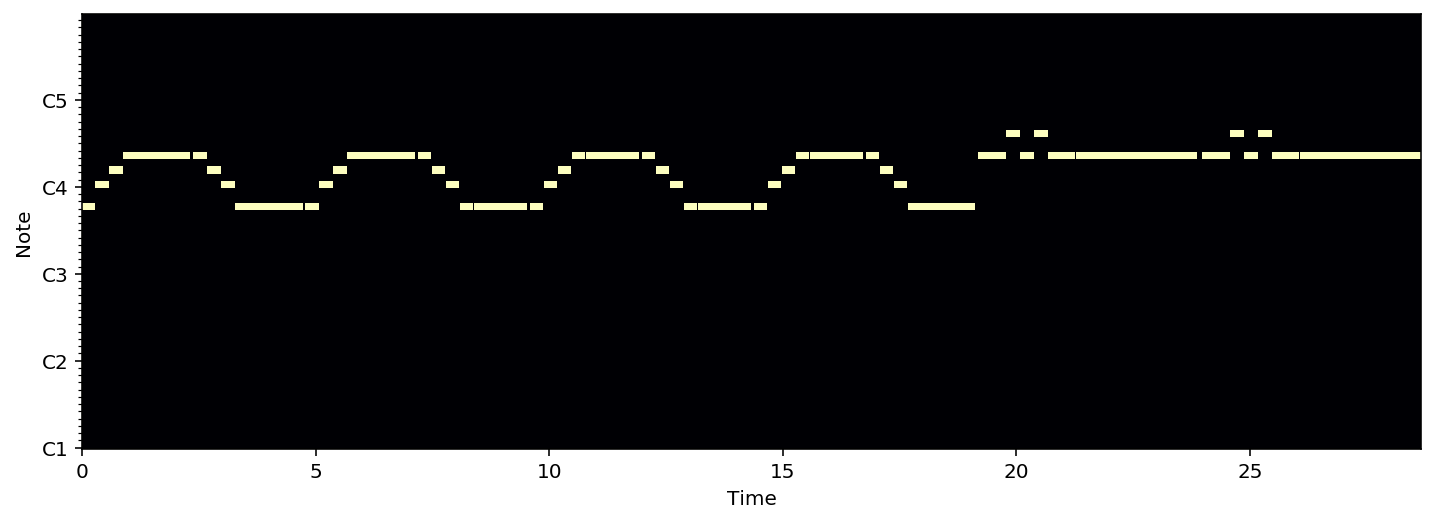

In [23]:
pm = pretty_midi.PrettyMIDI('MIDI/sampleMidi/Cool_Blues_test1.mid')
plt.figure(figsize=(12, 4))
plot_piano_roll(pm, 24, 84)
#end_time = mid.get_end_time()

In [24]:
print('Instrument Type:',pm.instruments)
print('Count:',len(pm.instruments))

Instrument Type: [Instrument(program=0, is_drum=False, name="")]
Count: 1


In [25]:
print('There are {} time signature changes'.format(len(pm.time_signature_changes)))
print('There are {} instruments'.format(len(pm.instruments)))
print('Instrument 3 has {} notes'.format(len(pm.instruments[0].notes)))
print('Instrument 4 has {} pitch bends'.format(len(pm.instruments[0].pitch_bends)))
print('Instrument 5 has {} control changes'.format(len(pm.instruments[0].control_changes)))

There are 1 time signature changes
There are 1 instruments
Instrument 3 has 56 notes
Instrument 4 has 0 pitch bends
Instrument 5 has 5 control changes


In [26]:
# 取得特定位置的音符時間
pos = 10
print('position',pos,"'s time:",pm.instruments[0].notes[pos].start)

# 時間單位轉換成 tick單位
tick = pm.time_to_tick(pm.instruments[0].notes[10].start)
print('time → tick:',tick)

# tick單位轉成時間單位
print('tick → time:',pm.tick_to_time(int(tick)))

position 10 's time: 4.7999920000000005
time → tick: 3840
tick → time: 4.7999920000000005


In [27]:
# 根據tempo轉換事件，回傳beat位置
beats = pm.get_beats()
# 根據tempo轉換和拍號轉換事件，回傳downbeat位置
downbeats = pm.get_downbeats()
print('beats:\n',beats)
print('downbeats:\n',downbeats)

beats:
 [ 0.        0.599999  1.199998  1.799997  2.399996  2.999995  3.599994
  4.199993  4.799992  5.399991  5.99999   6.599989  7.199988  7.799987
  8.399986  8.999985  9.599984 10.199983 10.799982 11.399981 11.99998
 12.599979 13.199978 13.799977 14.399976 14.999975 15.599974 16.199973
 16.799972 17.399971 17.99997  18.599969 19.199968 19.799967 20.399966
 20.999965 21.599964 22.199963 22.799962 23.399961 23.99996  24.599959
 25.199958 25.799957 26.399956 26.999955 27.599954 28.199953]
downbeats:
 [ 0.        2.399996  4.799992  7.199988  9.599984 11.99998  14.399976
 16.799972 19.199968 21.599964 23.99996  26.399956]


Text(0, 0.5, 'Proportion')

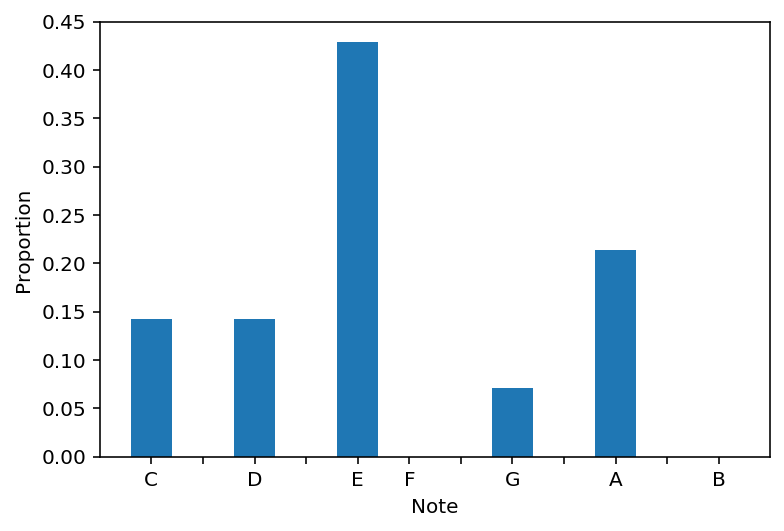

In [28]:
# 各音符佔的比例
plt.bar(np.arange(12), pm.get_pitch_class_histogram());
plt.xticks(np.arange(12), ['C', '', 'D', '', 'E', 'F', '', 'G', '', 'A', '', 'B'])
plt.xlabel('Note')
plt.ylabel('Proportion')

In [29]:
# 查看midi檔案總長度(回傳MIDI檔案中最後一個元素的時間值)
pm = pretty_midi.PrettyMIDI('MIDI/sampleMidi/Cool_Blues_test1.mid')
time = pm.get_end_time()
print('midi檔案總長度:',time)

midi檔案總長度: 28.678702202083333


In [30]:
# 查看midi檔案總長度(回傳MIDI檔案中最後一個元素的時間值)
pm = pretty_midi.PrettyMIDI('MIDI/sampleMidi/Silent_Night_test2.mid')
time = pm.get_end_time()
print('midi檔案總長度:',time)

midi檔案總長度: 41.30868115208334
